In this labwork, you will learn how to open the netcdf file and plot the multidimensional data.

In [ ]:
!pip install netCDF4
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 29.6 MB/s eta 0:00:00


In [ ]:
pip install geopandas matplotlib


#---------------------------
# EX1: draw a map of Vietnam
#---------------------------
Draw two maps of Vietnam. The first map contains only the borderline. The second map contains both the borderline and the border of 63 provinces of Vietnam.


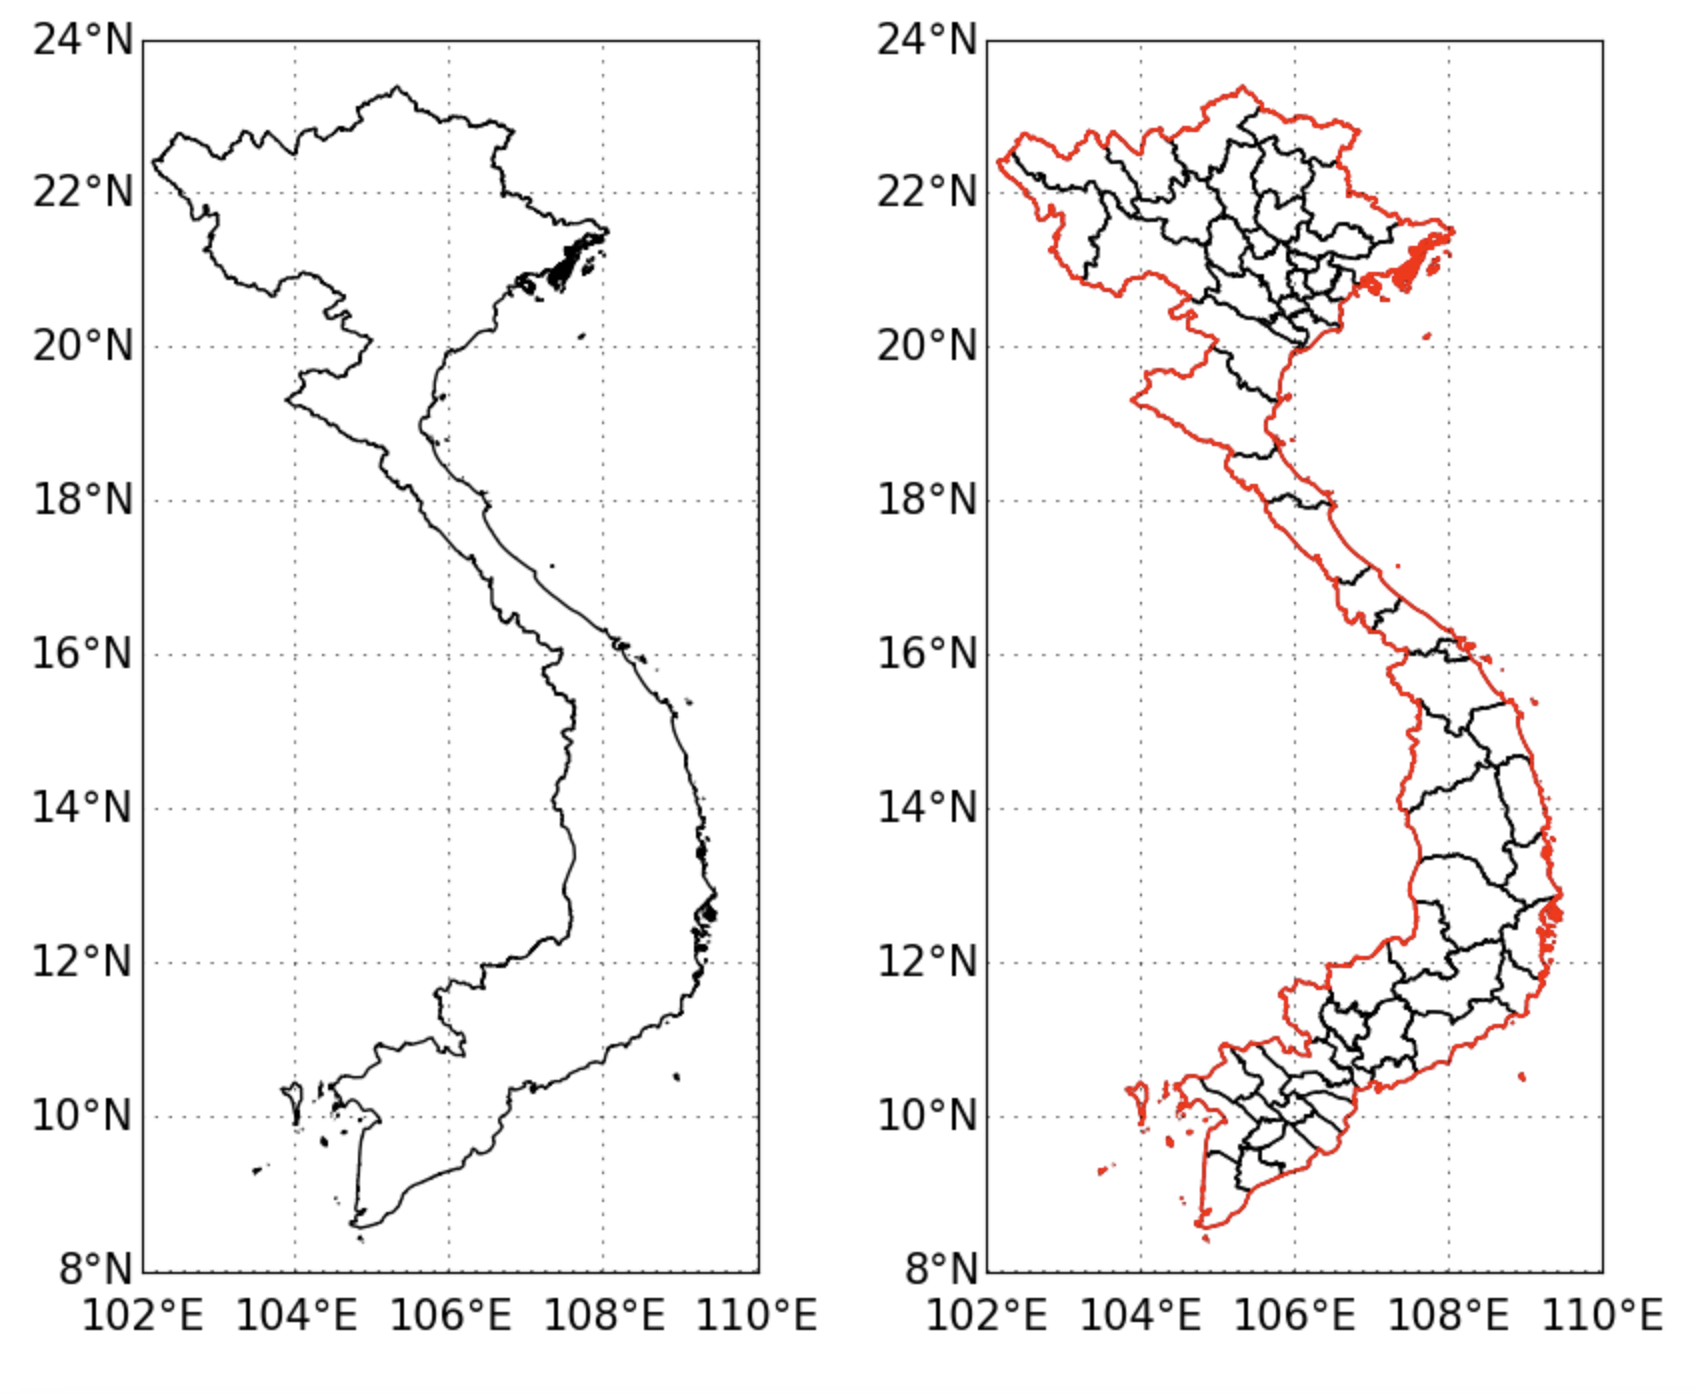

#---------------------------

In [ ]:
#####################
# EX1
#####################
# Nhớ plot cả đảo nha các em, hình mẫu thầy quên plot đó, mà máy thầy chậm quá ko sửa dc :D

#import library
import numpy as np
from numpy import *
from netCDF4 import *
import netCDF4 as nc

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path='/content/drive/MyDrive/Data Visualization/d02_2019-11-12_sample.nc'
island_path='/content/drive/MyDrive/Data Visualization/Islands/haidao'
vietnam_province_path='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1.shp'
vietnam_province_path1='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0.shp'

Mounted at /content/drive


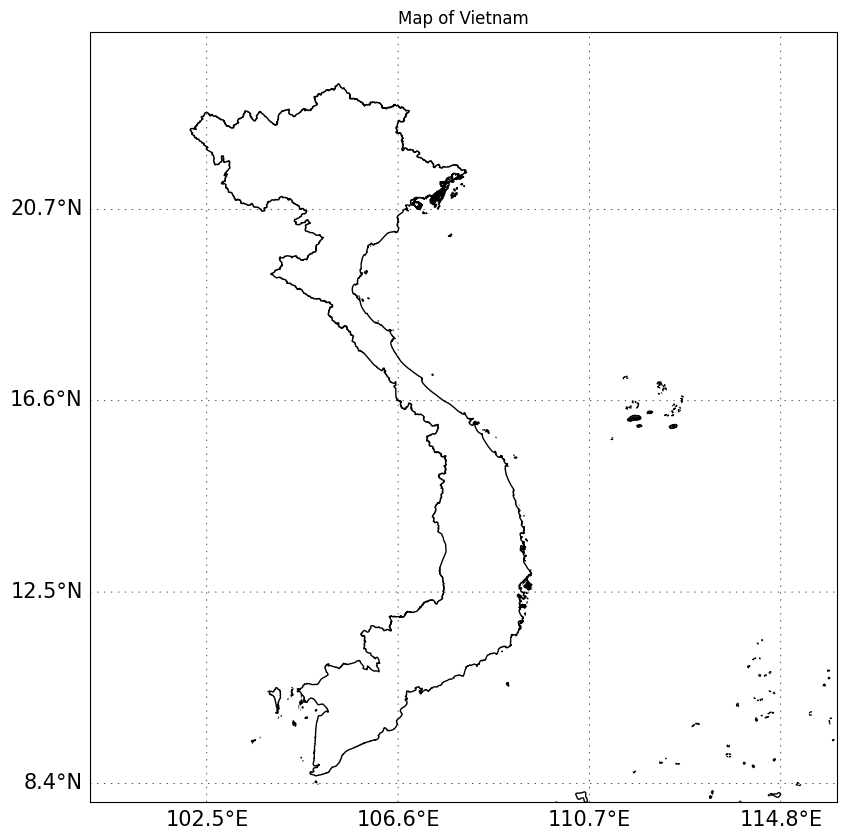

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt
lon_min = 100
lon_max = 116
lat_min = 8
lat_max = 24.5
gdf1 = gpd.read_file(vietnam_province_path1)
fig, ax = plt.subplots(figsize=(10, 10))
gdf1.plot(ax=ax, color='white', edgecolor='k')

ax.set_title("Map of Vietnam")
map1 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map1.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map1.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map1.readshapefile(island_path, 'haidao',linewidth=1, color='k')
plt.show()

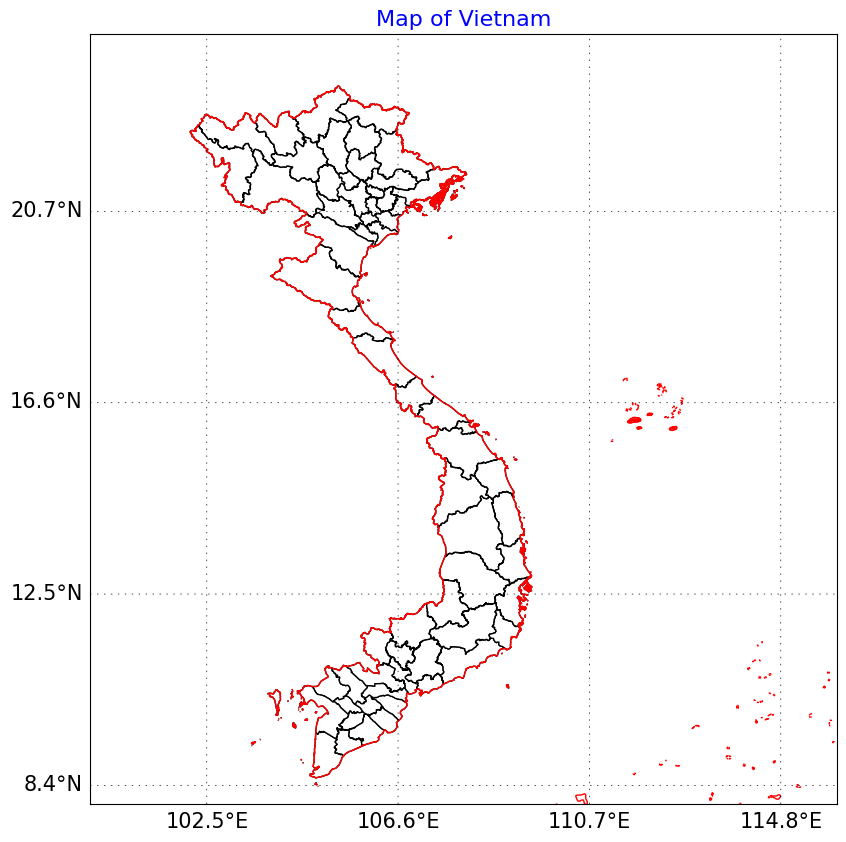

In [ ]:


# Load the shapefile data
gdf = gpd.read_file(vietnam_province_path)
vietnam_border_gdf=gpd.read_file(vietnam_province_path1)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='k')
vietnam_border_gdf.boundary.plot(ax=ax, color='red', linewidth=1)
title_text = "Map of Vietnam"
title_font = {'fontsize': 16, 'color': 'blue'}  # Modify these properties as needed
ax.set_title(title_text, fontdict=title_font)
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.readshapefile(island_path, 'haidao',linewidth=1, color='red')
plt.show()


#---------------------------
# EX2: work with netcdf data
#---------------------------
Download the file from the labwork.
Load the file. Read the variable 'T2'

Print the shape of data, shape of lat and lon
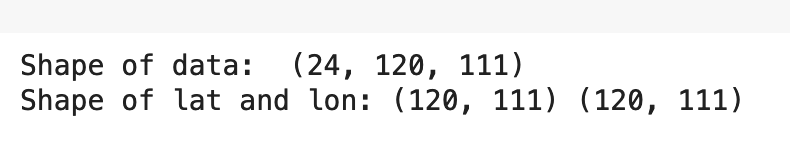
#---------------------------

In [ ]:
#####################
# EX2
#####################import netCDF4 as nc

# Open the NetCDF file
nc_file = nc.Dataset(file_path, 'r')

#print the variables inside the file
for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
       data = nc_file.variables[name]
       #print(name, '\t',data.units, '\t\t',data.shape, '\t',data.dtype, '\t',data.dimensions)



#read the "Temperature at 2m" (T2)
var_name = 'T2'
data = squeeze(nc_file.variables['%s' %(var_name)][:])
print ('\nShape of data: ', data.shape)


#read the lon and lat coresponding to the data
lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print ('Shape of lat and lon:', lat.shape, lon.shape)







Shape of data:  (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


#---------------------------
# EX3: work with netcf data (continue)
#---------------------------

Draw 3 maps of temperature, at [0,6,12] hour.
Use 1 colorbar for 3 subplot.
The height of the colorbar is adjusted within the limit of 19.9N - 22.0N
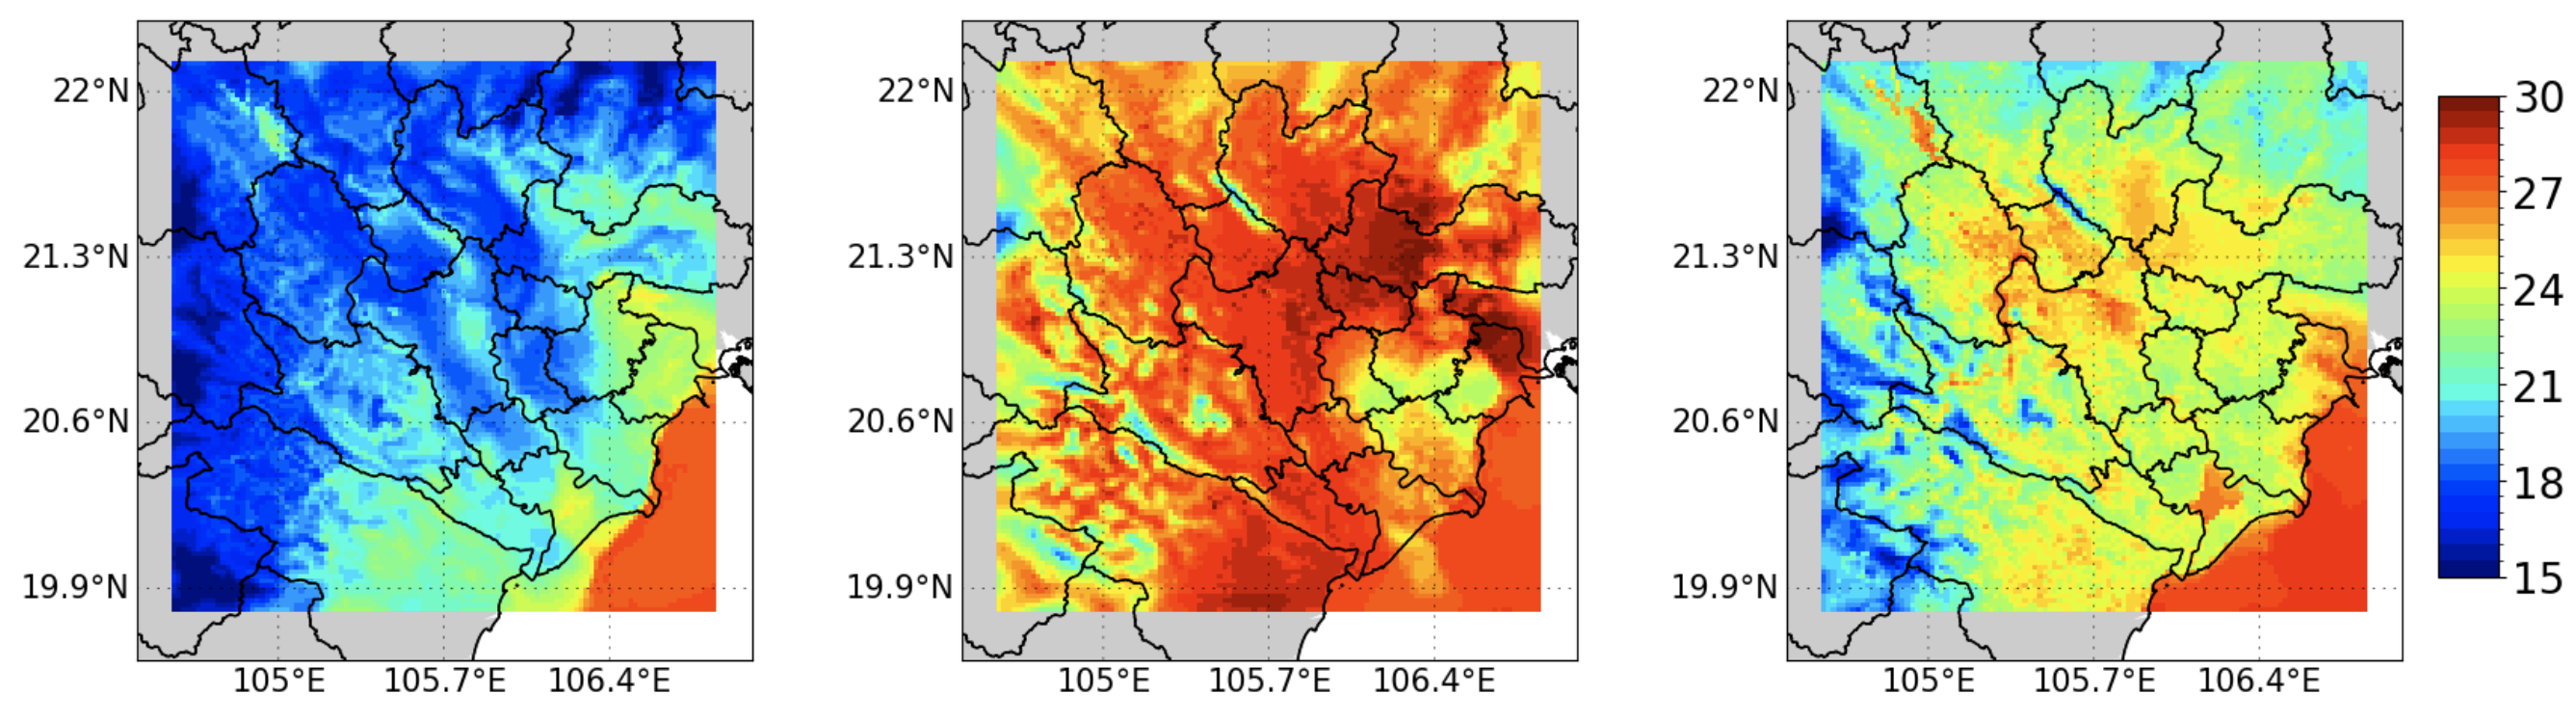

#---------------------------

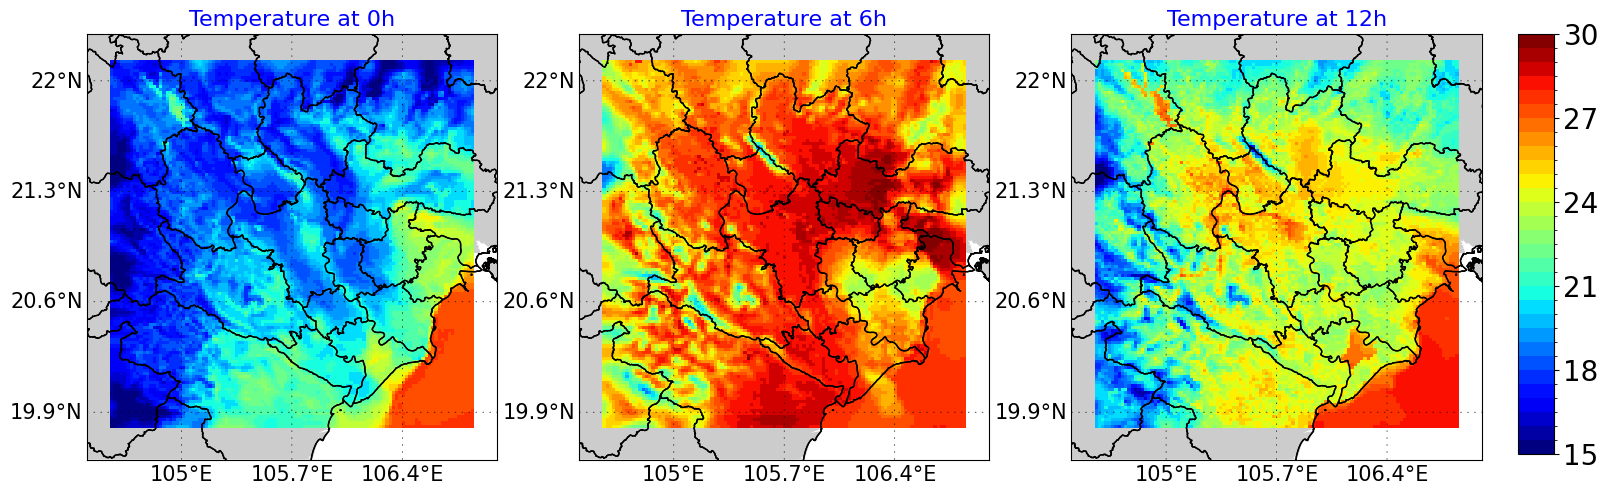

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import numpy as np


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


cbar_axes = fig.add_axes([0.92, 0.15, 0.02, 0.7])
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

color_levels = np.arange(15, 31, 0.5)[:-1]
titles = ["Temperature at 0h", "Temperature at 6h", "Temperature at 12h"]
for hour, ax, color_level, title in zip([0, 6, 12], axes, color_levels, titles):
    lon_min = 104.4
    lon_max = 107
    lat_min = 19.6
    lat_max = 22.3
    map32 = Basemap(
        projection='merc',
        llcrnrlon=lon_min,
        llcrnrlat=lat_min,
        urcrnrlon=lon_max,
        urcrnrlat=lat_max,
        resolution='i',
        epsg=4326,
        ax=ax
    )

    lon_map, lat_map = map32(lon, lat)

    map32.fillcontinents(zorder=0)

    #
    map32.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1','gadm41_VNM_1',
    linewidth=1, color='k')
    map32.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0','gadm41_VNM_0',
	  linewidth=1, color='k')

    parallels = np.arange(-90., 150, np.around((lat_max - lat_min) / 4, decimals=1))  # Lat
    meridians = np.arange(0., 180., np.around((lat_max - lat_min) / 4, decimals=1))
    map32.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map32.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

    #
    norm = BoundaryNorm(color_levels, ncolors=color_map.N, clip=False)
    cm = map32.pcolormesh(lon_map, lat_map, data[hour, :, :] - 273.15, norm=norm, cmap='jet')
    title_font = {'fontsize': 16, 'color': 'blue'}
    ax.set_title(title,title_font)


cbar = plt.colorbar(cm, cax=cbar_axes, ticks= [15, 18, 21, 24, 27, 30],shrink=0.6)
cbar.ax.tick_params(labelsize=20)


plt.show()



#---------------------------
# EX3: same as above but now with three colorbars, with different color range
#---------------------------

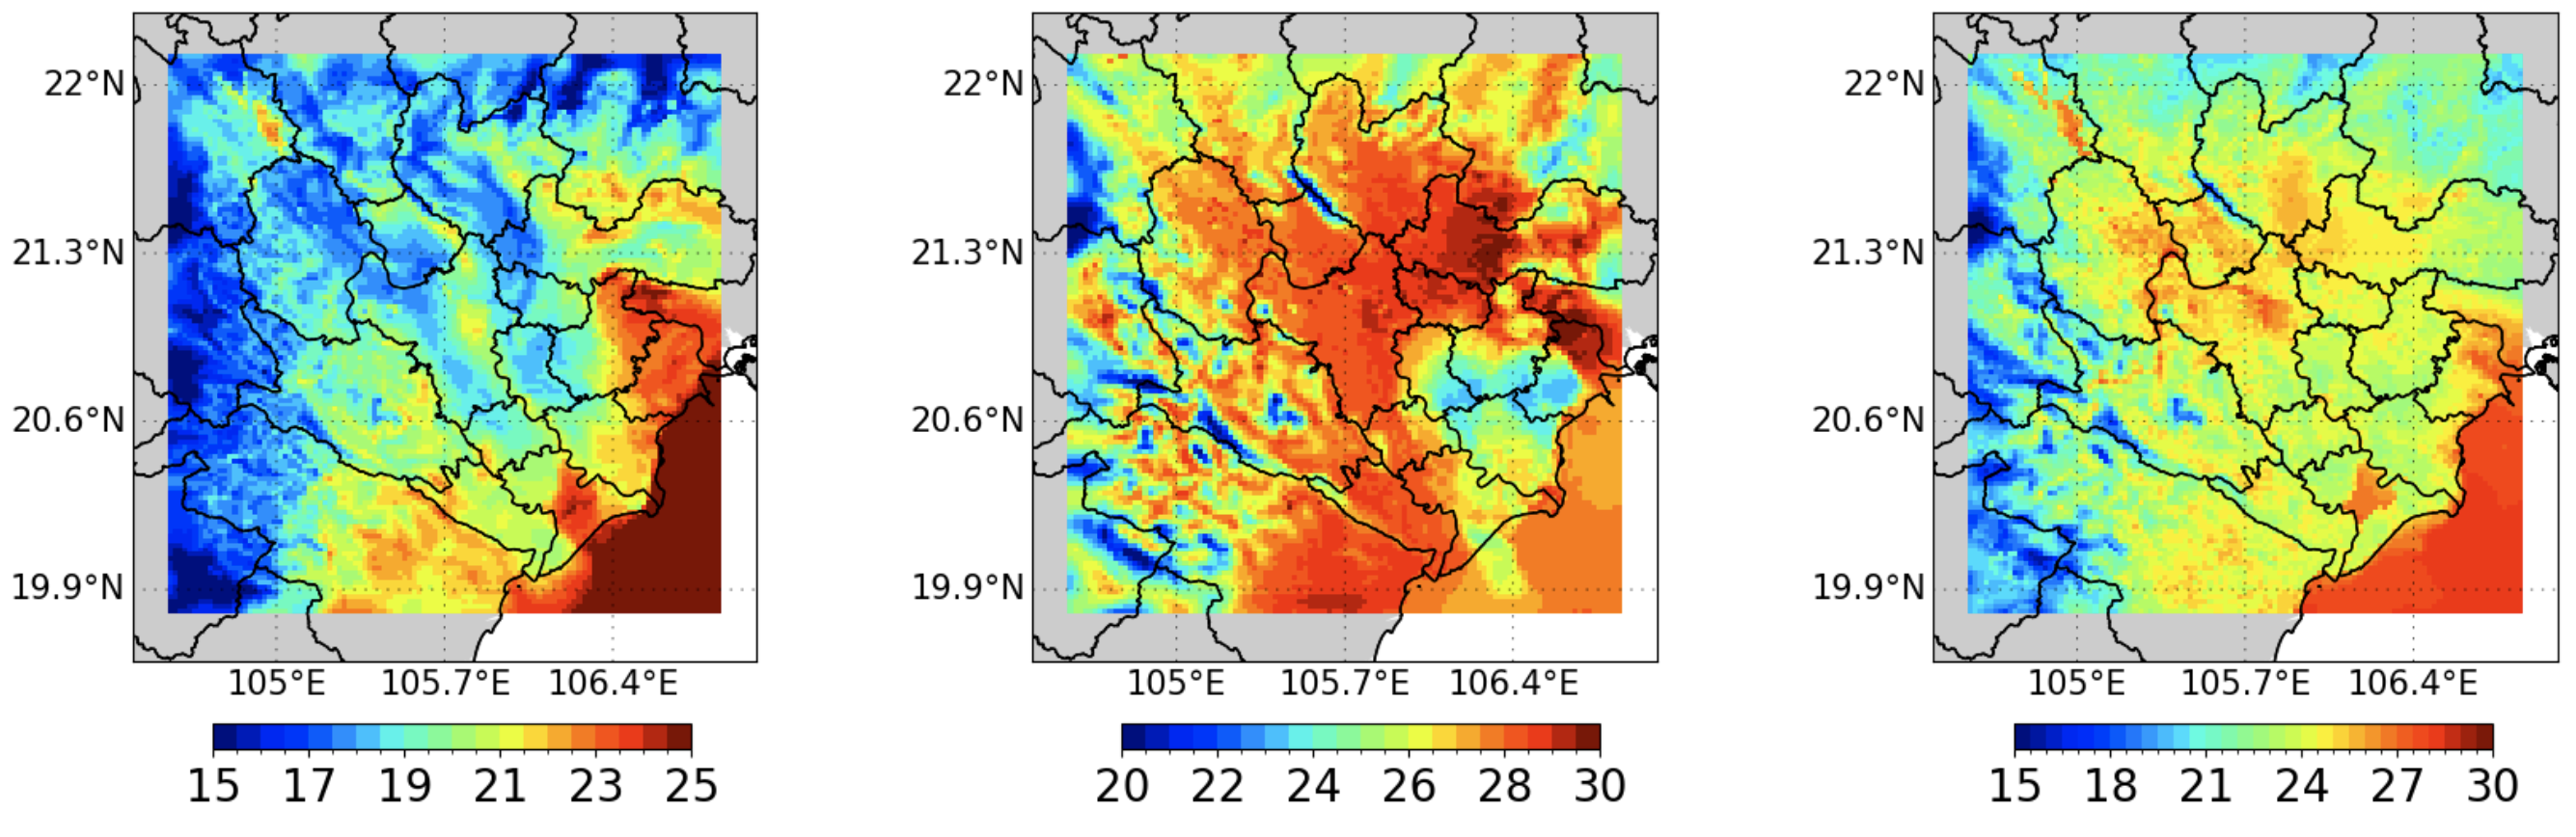

#---------------------------

In [ ]:
colorbar_ranges = [(15, 25), (20, 30), (15, 30)]

for i, colorbar_range in enumerate(colorbar_ranges):
    ax = axes[i]
    lon_min, lon_max, lat_min, lat_max = 104.4, 107, 19.6, 22.3


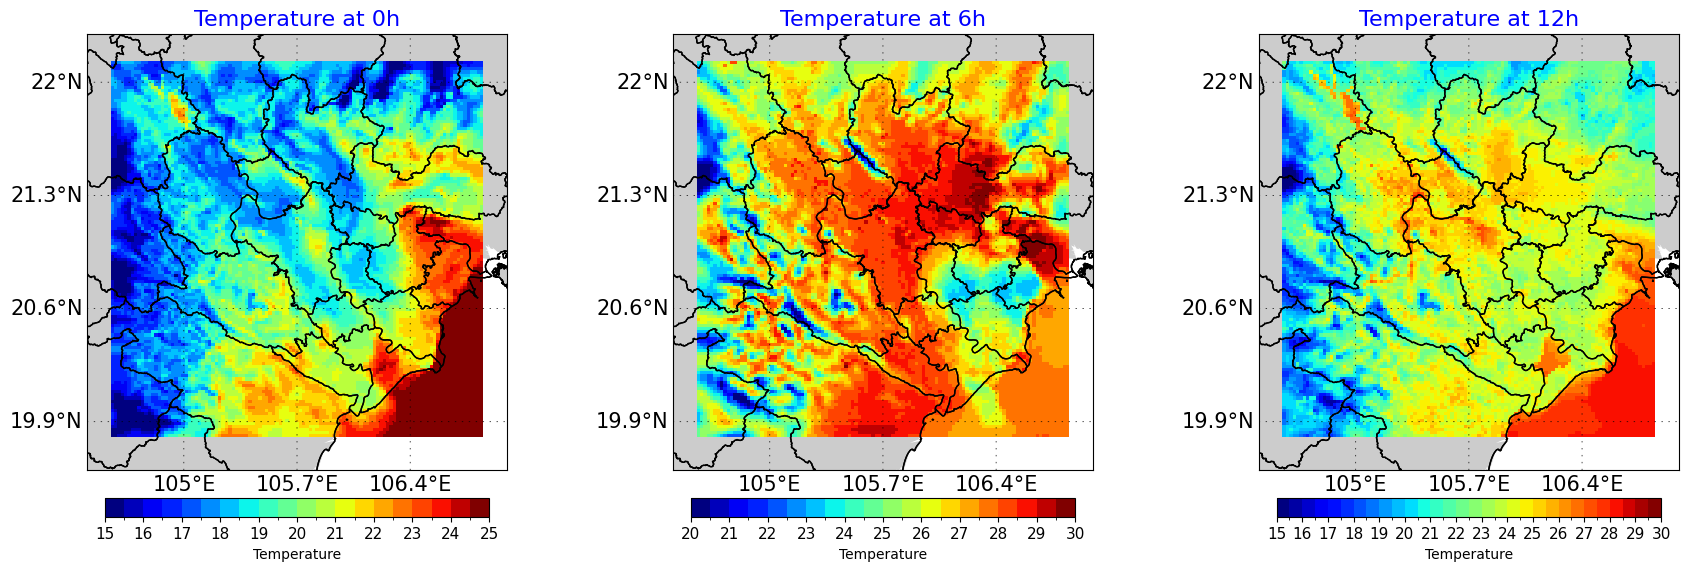

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans
from matplotlib.colors import BoundaryNorm
import numpy as np


# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Common colorbar values
color_levels = [np.arange(15, 25.5, 0.5), np.arange(20, 30.5, 0.5), np.arange(15, 30.5, 0.5)]
colorbar_ranges = [(15, 25), (20, 30), (15, 30)]
titles = ["Temperature at 0h", "Temperature at 6h", "Temperature at 12h"]
for hour, ax, color_level, title in zip([0, 6, 12], axes, color_levels, titles):
    # Basemap and some decorations
    lon_min = 104.4
    lon_max = 107
    lat_min = 19.6
    lat_max = 22.3
    map3 = Basemap(
        projection='merc',
        llcrnrlon=lon_min,
        llcrnrlat=lat_min,
        urcrnrlon=lon_max,
        urcrnrlat=lat_max,
        resolution='i',
        epsg=4326,
        ax=ax
    )

    lon_map, lat_map = map3(lon, lat)

    map3.fillcontinents(zorder=0)

    #
    map3.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1','gadm41_VNM_1',
    linewidth=1, color='k')
    map3.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0','gadm41_VNM_0',
	  linewidth=1, color='k')

    parallels = np.arange(-90., 150, np.around((lat_max - lat_min) / 4, decimals=1))
    meridians = np.arange(0., 180., np.around((lat_max - lat_min) / 4, decimals=1))
    map3.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map3.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)
    color_map = plt.get_cmap('jet')
    color_map.set_bad(color='white')

    #
    norm = BoundaryNorm(color_level, ncolors=color_map.N, clip=False)
    cm = map3.pcolormesh(lon_map, lat_map, data[hour, :, :] - 273.15, norm=norm, cmap='jet',ax=ax)

    #
    v = np.arange(colorbar_range[0], colorbar_range[1]+1 , 1)
    cbar = plt.colorbar(cm, ax=ax,label='Temperature', orientation='horizontal',pad=0.05,ticks=v,shrink=0.7)
    cbar.ax.tick_params(labelsize=11)
    title_font = {'fontsize': 16, 'color': 'blue'}
    ax.set_title(title,title_font)


plt.tight_layout()


plt.show()

**Plot without sea**


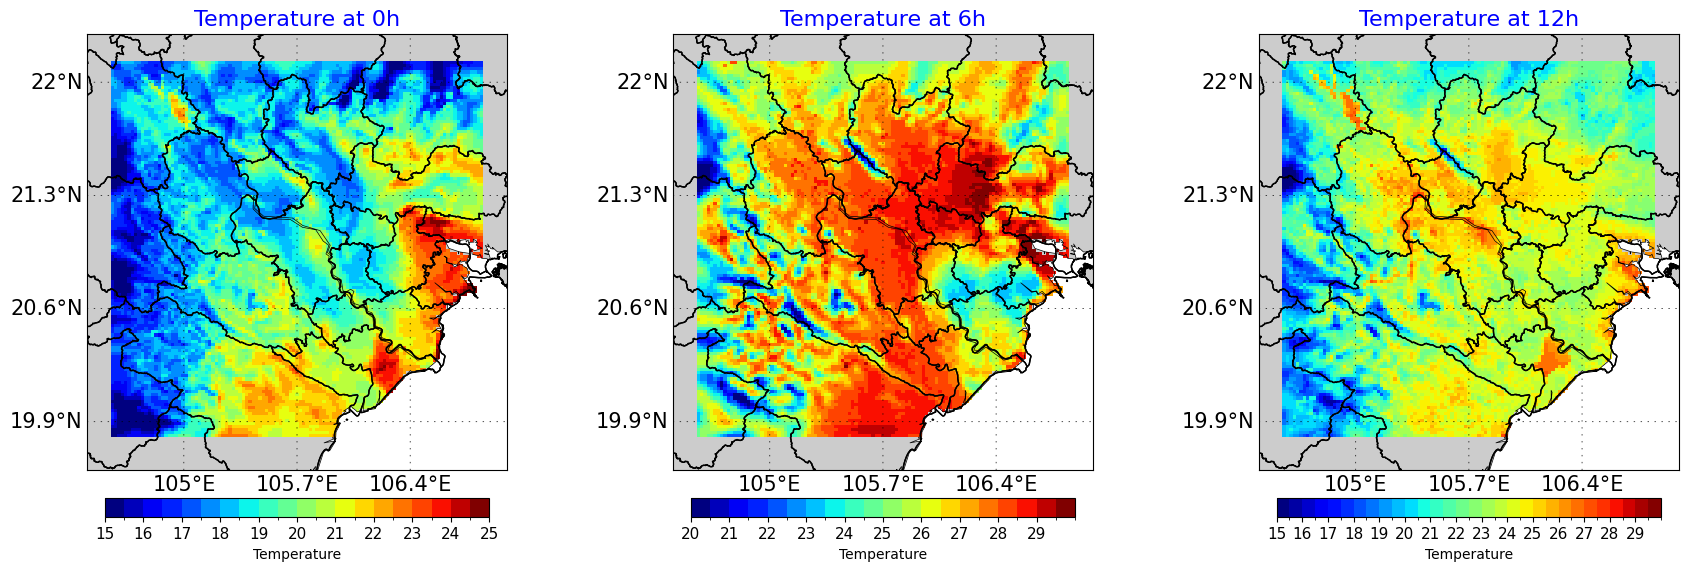

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#
color_levels = [np.arange(15, 25.5, 0.5), np.arange(20, 30.5, 0.5), np.arange(15, 30.5, 0.5)]
colorbar_ranges = [(15, 24), (20, 29), (15, 29)]
titles = ["Temperature at 0h", "Temperature at 6h", "Temperature at 12h"]
for hour, ax, color_level, title in zip([0, 6, 12], axes, color_levels, titles):
    lon_min = 104.4
    lon_max = 107
    lat_min = 19.6
    lat_max = 22.3
    map4 = Basemap(
        projection='merc',
        llcrnrlon=lon_min,
        llcrnrlat=lat_min,
        urcrnrlon=lon_max,
        urcrnrlat=lat_max,
        resolution='i',
        epsg=4326,
        ax=ax
    )

    lon_map, lat_map = map4(lon, lat)
    map4.drawcoastlines(linewidth=0.5)
    map4.fillcontinents(zorder=0)


    map4.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1','gadm41_VNM_1',
    linewidth=1, color='k')
    map4.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0','gadm41_VNM_0',
	  linewidth=1, color='k')

    parallels = np.arange(-90., 150, np.around((lat_max - lat_min) / 4, decimals=1))
    meridians = np.arange(0., 180., np.around((lat_max - lat_min) / 4, decimals=1))
    map4.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map4.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)


    norm = BoundaryNorm(color_level, ncolors=color_map.N, clip=False)
    masked_data = maskoceans(lon_map, lat_map,data[hour, :, :] - 273.15, inlands=False,grid=1.25,resolution='i')
    cm = map4.pcolormesh(lon_map, lat_map, masked_data, norm=norm, cmap='jet',ax=ax)


    v = np.arange(colorbar_range[0], colorbar_range[1]+1 , 1)
    cbar = plt.colorbar(cm, ax=ax,label='Temperature' ,orientation='horizontal',pad=0.05,ticks=v,shrink=0.7)
    cbar.ax.tick_params(labelsize=11)
    title_font = {'fontsize': 16, 'color': 'blue'}
    ax.set_title(title,title_font)



plt.tight_layout()


plt.show()